In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import Normalizer

In [27]:
d=pd.read_csv(r"D:\PT\DataSets\Mall_Customers.csv")
d.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0             1    Male   19                  15              39
1             2    Male   21                  15              81
2             3  Female   20                  16               6
3             4  Female   23                  16              77
4             5  Female   31                  17              40
..          ...     ...  ...                 ...             ...
195         196  Female   35                 120              79
196         197  Female   45                 126              28
197         198    Male   32                 126              74
198         199    Male   32                 137              18
199         200    Male   30                 137              83

[200 rows x 5 columns]>

In [28]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
d.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [30]:
data=d.drop("CustomerID",axis=1)
data=data.drop("Genre",axis=1)
data=data.drop("Age",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Annual_Income_(k$)  200 non-null    int64
 1   Spending_Score      200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [135]:
mini=0
minj=0
minval=200
for i in range(1,11):
    for j in range(1,11):
        db=DBSCAN(eps=i,min_samples=j,metric="euclidean")
        model=db.fit(data)
        label=model.labels_
        l=label.tolist()
        c=l.count(-1)
        if(minval>c) and j>2 and i<9:
            minval=c
            mini=i
            minj=j

In [136]:
print(mini)
print(minj)

8
3


In [139]:
db=DBSCAN(eps=8,min_samples=3,metric="euclidean")
model=db.fit(data)
label=model.labels_
label


array([ 0,  1,  2,  1,  0,  1,  2,  3,  2,  1,  2,  3,  2,  1,  2,  1,  0,
        1,  0,  3,  0,  1,  2,  1,  4,  1,  0, -1,  0,  1,  2,  1,  2,  1,
        4,  1,  4,  1,  5,  1,  5,  1,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  5,  6,  5,  6,  7,  6,  7,  6,  5,  6,  7,  6,
        7,  6,  7,  6,  7,  6,  5,  6,  7,  6,  5,  6,  7,  6,  7,  6,  7,
        6,  7,  6,  7,  6,  7,  6,  5,  6,  7,  6,  7,  6,  7,  6,  7,  6,
        7,  6,  7,  6,  7,  6,  7,  6,  7,  6, -1,  6,  7,  6, -1, -1,  7,
       -1,  7,  6,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

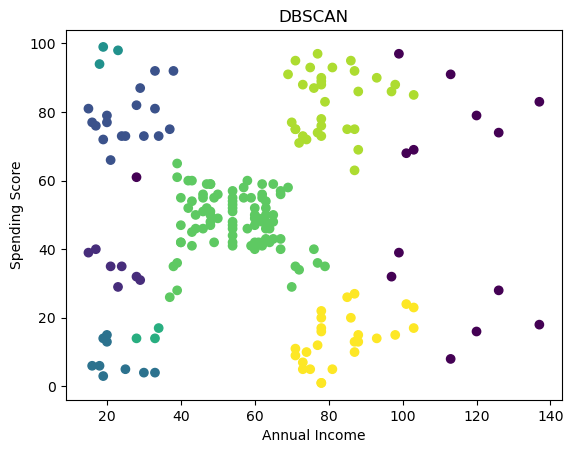

In [140]:
plt.scatter(data["Annual_Income_(k$)"],data["Spending_Score"],c=db.labels_)
plt.title("DBSCAN")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
